<img src='./figures/logo-ecole-polytechnique-ve.jpg' style='position:absolute; top:0; right:0;' width='100px' height='' alt='' />

<center>**Bachelor of Ecole Polytechnique**</center>
<center><i>Algorithms for Discrete Mathematics</i>, year 2, semester 1</center>

# Experimental Maths 1: Primes and Euclid (with Solutions)


## Table of contents

- [1. Primes and factorization](#DistributionPrime)
 - [Prime numbers and divisibility](#DistributionPrime)
 - [Factorization](#Factorization)
 - [Euclid Algorithm and application](#EuclidAlgorithm)
- [2. Sums of squares](#SumsOfTwoSquares)
- [3. A mysterious function](#ChangeBasis)


In [1]:
# execute this part to modify the css style
from IPython.core.display import HTML
def css_styling():
    styles = open("./style/custom2.css").read()
    return HTML(styles)
css_styling()


In [1]:
## loading python libraries

# necessary to display plots inline:
%matplotlib inline   

# load the libraries
import matplotlib.pyplot as plt # 2D plotting library
import numpy as np              # package for scientific computing  
from math import *              # package for mathematics (pi, arctan, sqrt, factorial ...)


<a id="DistributionPrime"></a>
# Primes and factorization
## Prime numbers and divisibility

We aim to investigate the distribution of primes among integers. Namely, how many prime numbers are there (approximately) between $1$ and $n$?

<div markdown=1 class="DoIt"> 

Write a boolean function IsPrime($n$) which returns `True` if and only $n$ is prime.<br>
<i>(In python $a\ (\mathrm{mod}\ p)$ is obtained with `a%p`.)</i>

In [2]:
def IsPrime(n):
    # input: integer n
    # output: True or False depending on whether n is prime or not

    if n == 2:
        return True
    if n % 2 == 0:
        return False
    for i in range(3, int(sqrt(n)) + 1, 2):
        if n % i == 0:
            return False
    return True

Now we are ready for experiment. For $n\geq 2$, let $\pi(n)$ denote the number of primes less than $n$. For example, $\pi(11)=5$ since $2,3,5,7,11$ are prime.

<div markdown=1 class="DoIt">

1. Write a script which takes as input $n$ and returns the list $[\pi(2),\pi(3),\dots,\pi(n)]$.
2. Plot the function $n \mapsto \pi(n)$ (try $n=100,1000,10000$).

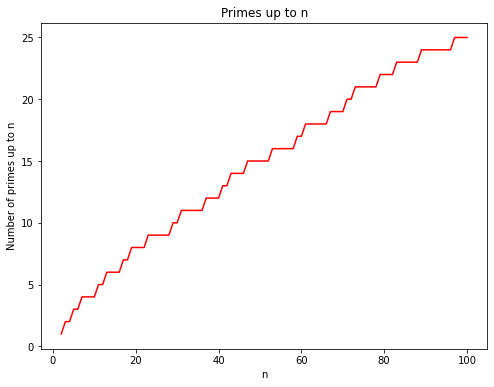

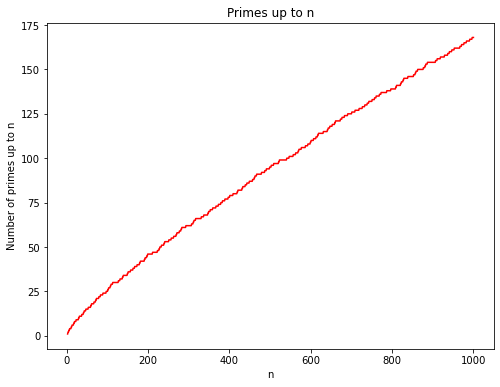

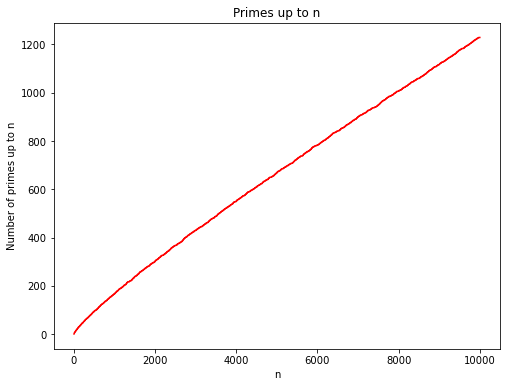

In [3]:
def Primes(n):
    # We use a dictionary to store the number of primes up to n which is more efficient than a list
    lis = []
    dic = {2: 1}
    for i in range(3, n + 1):
        if IsPrime(i):
            dic[i] = 1 + dic[i - 1]
        else:
            dic[i] = dic[i - 1]

    for i in range(2, n + 1):
        lis.append(dic[i])
    return lis


# plot the primes
n = 100
plt.figure(figsize=(8, 6))
x = np.arange(2, n + 1)
y = Primes(n)
plt.xlabel('n')
plt.ylabel('Number of primes up to n')
plt.title('Primes up to n')
plt.plot(x, y, 'r')

n = 1000
plt.figure(figsize=(8, 6))
x = np.arange(2, n + 1)
y = Primes(n)
plt.xlabel('n')
plt.ylabel('Number of primes up to n')
plt.title('Primes up to n')
plt.plot(x, y, 'r')

n = 10000
plt.figure(figsize=(8, 6))
x = np.arange(2, n + 1)
y = Primes(n)
plt.xlabel('n')
plt.ylabel('Number of primes up to n')
plt.title('Primes up to n')
plt.plot(x, y, 'r')


<div markdown=1 class="DoIt"> 

Modify your previous plot to illustrate the <a href="https://en.wikipedia.org/wiki/Prime_number_theorem">Prime Number Theorem</a>:
$$
\pi(n)\sim \frac{n}{\log(n)}.
$$


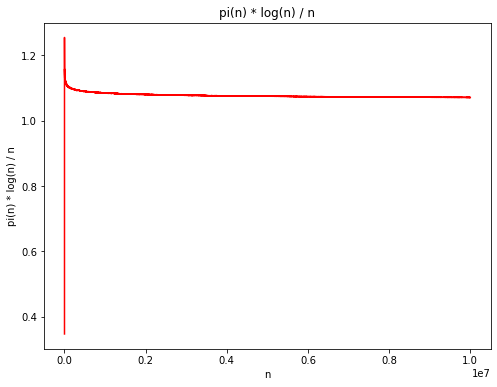

In [46]:
# plot the pi(n) * log(n) / n
def Pilog(n):
    lis = []
    prime_lis = Primes(n)
    for i in range(2, n + 1):
        lis.append(prime_lis[i - 2] * log(i) / i)
    return lis

n = 10000000
plt.figure(figsize=(8, 6))
x = np.arange(2, n + 1)
y = Pilog(n)
plt.xlabel('n')
plt.ylabel('pi(n) * log(n) / n')
plt.title('pi(n) * log(n) / n')
plt.plot(x, y, 'r')
plt.show()

<div markdown=1 class="Answers"> 

From the plot above, we can see that
$$
P(n) \sim C \cdot \frac{n}{\log(n)}.
$$
where $C$ is decreasing and tends to $1$ as $n$ tends to infinity.

<a id="Factorization"></a>
## Factorization

<div markdown=1 class="DoIt"> Write a function `Factorize(n)` which returns the factorization of `n` into primes. For example your function should return:

```python
Factorize(2158884)
[2, 2, 3, 3, 7, 13, 659]
```

<i>Hint: Think recursive!</i>

In [4]:
def Factorize(n):
    # input: integer n
    # output: list of factors of n
    i = 2
    factors = []
    while i * i <= n:
        if n % i:
            i += 1
        else:
            n //= i
            factors.append(i)
    if n > 1:
        factors.append(n)
    return factors


print(Factorize(2158884))


[2, 2, 3, 3, 7, 13, 659]


For $n\geq 2$ we introduce 
$$
F(n)=\text{Number of prime factors of $n$, counted with multiplicity}. 
$$
For example, $F(2158884)=7$.

<div markdown=1 class="DoIt"> 

Plot the function $n \mapsto F(n)$ (try $n=100,1000,5000$).

7


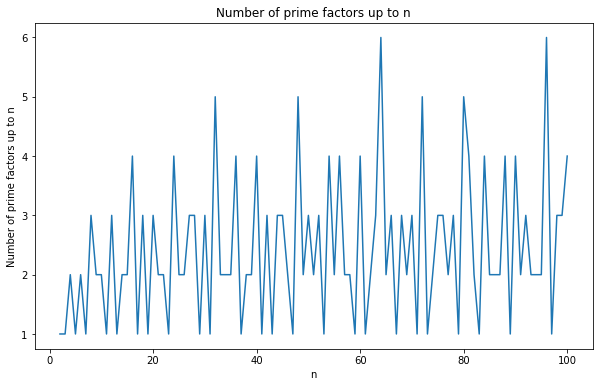

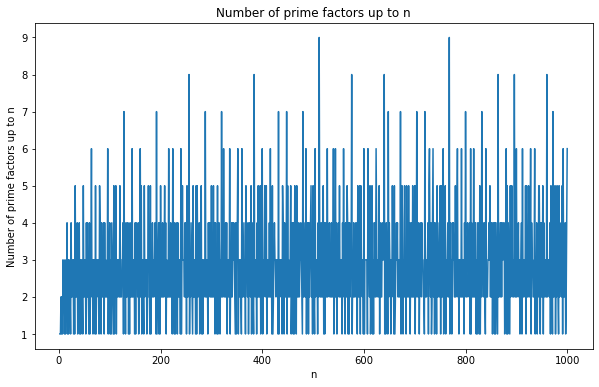

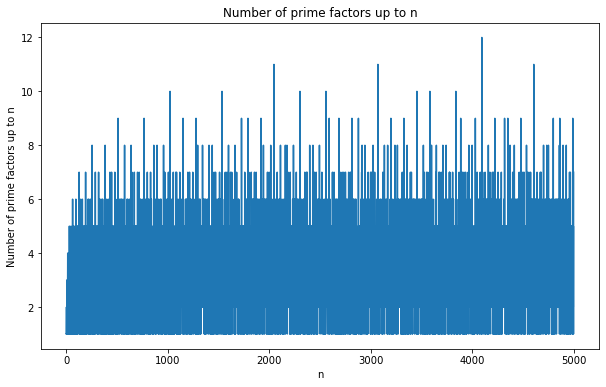

In [60]:
def F(n):
    return len(Factorize(n))

# plot the graph
n = 100
plt.figure(figsize=(10, 6))
x = np.arange(2, n + 1)
y = [F(i) for i in x]
plt.xlabel('n')
plt.ylabel('Number of prime factors up to n')
plt.title('Number of prime factors up to n')
plt.plot(x, y)
plt.show()

n = 1000
plt.figure(figsize=(10, 6))
x = np.arange(2, n + 1)
y = [F(i) for i in x]
plt.xlabel('n')
plt.ylabel('Number of prime factors up to n')
plt.title('Number of prime factors up to n')
plt.plot(x, y)
plt.show()

n = 5000
plt.figure(figsize=(10, 6))
x = np.arange(2, n + 1)
y = [F(i) for i in x]
plt.xlabel('n')
plt.ylabel('Number of prime factors up to n')
plt.title('Number of prime factors up to n')
plt.plot(x, y)
plt.show()


<div markdown=1 class="DoIt"> <b>(Theory)</b><br>

1. Plot on the previous picture $n\mapsto F(n)$ and $n\mapsto \log_2(n)$ (logarithm in basis two).
2. Prove the following: 
  - <b>(lower bound)</b> There are infinitely many $n$'s for which $F(n)=\log_2(n)$.
  - <b>(upper bound)</b> $F(n)\leq \log_2(n)$ for every $n$.


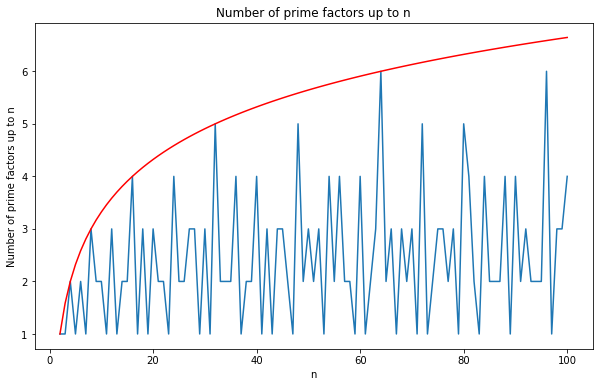

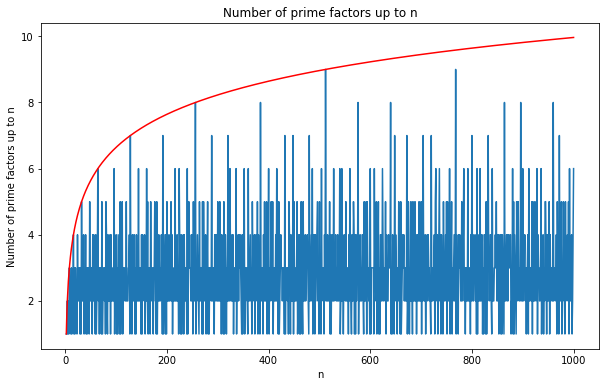

In [62]:
n = 100
plt.figure(figsize=(10, 6))
x = np.arange(2, n + 1)
y = [F(i) for i in x]
y1 = [log(i, 2) for i in x]
plt.xlabel('n')
plt.ylabel('Number of prime factors up to n')
plt.title('Number of prime factors up to n')
plt.plot(x, y)
plt.plot(x, y1, 'r')
plt.show()

n = 1000
plt.figure(figsize=(10, 6))
x = np.arange(2, n + 1)
y = [F(i) for i in x]
y1 = [log(i, 2) for i in x]
plt.xlabel('n')
plt.ylabel('Number of prime factors up to n')
plt.title('Number of prime factors up to n')
plt.plot(x, y)
plt.plot(x, y1, 'r')
plt.show()

<div markdown=1 class="Answers"> 

**Answer Question 1**

From the plot above, we can see that $F(n)$ is bounded by $\log_2(n)$. And they seem to coincide at $n=2,4,8,16,32$.

**Answer Question 2**

We can discuss by cases:

- when $n=2^k$ for some $k$, then we got $F(n)=k=\log_2 (n)$. Therefore, there are infinitely many $n$'s for which $F(n)=\log_2(n)$.
    
- For other integer $n$, we have the folowing analysis
    $$
    Factorize(n) = [a_1,a_2,\dots a_{F(n)}].
    $$
    Since for every $a_{i} \geq 2$ Then we got 
    $$
    n = a_1 \cdot a_2 \cdot \dots \cdot a_{F(n)} \geq 2^F(n).
    $$
    Therefore, $F(n) \leq \log_2(n)$.

<a id="EuclidAlgorithm"></a>
## The Euclid algorithm

We recall that Euclid's algorithm (which computes the gcd of two non-negative integers) relies on the fact that for every $a,b$ we have
$$
\begin{cases}
\mathrm{gcd}(a,b)&=\mathrm{gcd}(b,a\% b),\\
\mathrm{gcd}(a,0)&=a,\\
\end{cases}
$$
where $a\% b$ is the remainder of the euclidean division $a/b$.

<div markdown=1 class="DoIt">
Write a function `GreatestCommonDivisor(a,b)` which returns $\mathrm{gcd}(a,b)$ using the Euclid algorithm.

In [6]:
def GreatestCommonDivisor(a,b):
    # input: a,b: non-negative integers
    # output: returns the gcd of a and b
    if a == 0:
        return b
    if b == 0:
        return a
    return GreatestCommonDivisor(b, a % b)


Integers $m,n$ are said to be <i>coprime</i> if $\mathrm{gcd}(m,n)=1$. For example, $14,9$ are coprime.

In many references (see e.g. <a href="https://en.wikipedia.org/wiki/Coprime_integers#Probability_of_coprimality">Wikipedia</a>) one can read that
<center>
    "<i>The probability that two numbers randomly chosen are coprime is $\frac{6}{\pi^2}$.</i>"
</center>
Yet there is no obvious way to rigorously define what are "two numbers randomly chosen". A possible interpretation is the following:
$$
\frac{\mathrm{card}\left\{(i,j)\in[1,n]^2\text{ such that }\mathrm{gcd}(i,j)=1\right\}}{\mathrm{card}\left\{(i,j)\in[1,n]^2\right\}} \stackrel{n\to +\infty}{\to} \frac{6}{\pi^2}.
$$

<div markdown=1 class="DoIt"> 

Use your function `GreatestCommonDivisor` to draw a plot which illustrates the above convergence towards $\frac{6}{\pi^2}$ ($n=200$ should be enough).

0.60755


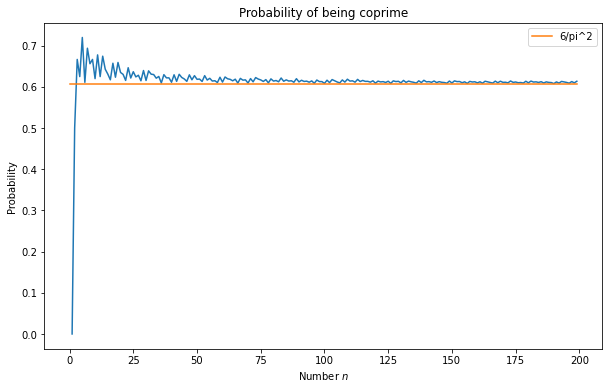

In [11]:
N = 200

N = 200  # Final value for the test

pairs = [0]  # List of pairs of integers (a,b) such that gcd(a,b)=1

for n in range(2, N):
    num = 0
    for m in range(1, n):
        if GreatestCommonDivisor(n, m) == 1:
            num += 1
    coprime_num = pairs[-1] + num * 2
    pairs.append(coprime_num)

X = np.arange(1, N)
print(pairs[-1] / (N**2 + 0.0))
Claim = 6 / (np.pi**2)

plt.figure(figsize=(10, 6))
plt.plot(X, pairs / (X**2 + 0.0))
plt.plot([0, n], [Claim, Claim], label='6/pi^2')
plt.xlabel('Number $n$'), plt.ylabel('Probability')
plt.title('Probability of being coprime')
plt.legend()
plt.show()


<div markdown=1 class="DoIt"> Write a function `GreatestCommonDivisor_3(a,b,c)` which returns the gcd of three numbers.

In [12]:
def GreatestCommonDivisor_3(a,b,c):
    # input: a,b,c: non-negative integers
    # output: returns the gcd of a,b,c
    return GreatestCommonDivisor(a,GreatestCommonDivisor(b,c))
    
GreatestCommonDivisor_3(11*4*10*7,4*10*3,5*4*10*17)

40

<a id="SumsOfTwoSquares"></a>
# 2. Sums of squares

We say that $n$ is a sum of two squares if there exist two integers $a,b\geq 1$ such that
$$
n=a^2+b^2.
$$
For example, $10=3^2+1^2$ is a sum of two squares while $11$ is not.

<div markdown=1 class="DoIt"> 

Write a function `SumsOfTwoSquares(n)` which returns the list of all decompositions of $n$ as a sum of two squares. For example:
```python
SumsOfTwoSquares(905)
[[8, 29], [11, 28], [28, 11], [29, 8]]
SumsOfTwoSquares(11)
[]
```

In [16]:
# write a function to compute all paris of sums of two squares equal to n
def SumsOfTwoSquares(n):
    decomposition = []
    for i in range(1, int(sqrt(n)) + 1):
        if sqrt(n - i**2).is_integer() and sqrt(n - i**2) >= 1:
            decomposition.append([i, int(sqrt(n - i**2))])
    return decomposition

for k in [905,11,4,18]:
    print('Decomposition(s) of ',k, ':',SumsOfTwoSquares(k))

Decomposition(s) of  905 : [[8, 29], [11, 28], [28, 11], [29, 8]]
Decomposition(s) of  11 : []
Decomposition(s) of  4 : []
Decomposition(s) of  18 : [[3, 3]]


<div markdown=1 class="DoIt"> 

Find the smallest integer $n$ which has strictly more than $7$ decompositions as a sum of two squares.

In [18]:
n = 1
check = False
while check == False:
    if len(SumsOfTwoSquares(n)) >= 7:
        check = True
    else:
        n += 1

print( 'The smallest number with at least 7 decompositions is ', n)
print('The decompositions are ', SumsOfTwoSquares(n))

The smallest number with at least 7 decompositions is  1105
The decompositions are  [[4, 33], [9, 32], [12, 31], [23, 24], [24, 23], [31, 12], [32, 9], [33, 4]]


<div markdown=1 class="DoIt"> 

1. <b>(Theory)</b> Let $a$ be any integer. Prove that $a^2$ is always equal to $0$ or $1$ modulo $4$. 
2. <b>(Theory)</b> Deduce that $\bigg(n\equiv 3 \ (\mathrm{mod}\ 4)\bigg)$ $\Rightarrow$ $\bigg( n\text{ is not a sum of two squares }\bigg)$.<br>
3. Is the converse true?

<div markdown=1 class="Answers">

**Answer Question 1**

Here are the $4$ possible values for $a\ (\mathrm{mod}\ 4)$, and the corresponding value for $a^2\ (\mathrm{mod}\ 4)$.
$$
\begin{array}{ccccc}
a(\bmod 4) & 0 & 1 & 2 & 3 \\
a^2(\bmod 4) & 0 & 1 & 0 & 1
\end{array}
$$
Hence $a^2$ is always equal to $0$ or $1$ mod $4$.

**Answer Question 2**

We have that $a^2+b^2 = 0+0$ or $1+0$ or $0+1$ or $1+1$ $\mathrm{mod}\ 4$. We have proved 
$$
n \text{ can be written as }a^2+b^2 \Rightarrow n \not\equiv 3 \ (\mathrm{mod}\ 4)
$$
which is the contraposite of the claimed assertion.

**Answer Question 3**

We can find a counterexample that $n=22$ which is not the sum of two squares also not $n\equiv 3 \ (\mathrm{mod}\ 4)$.

<a id="ChangeBasis"></a>
# 3. Bonus: A mysterious function

<div markdown=1 class="DoIt"> What does the following function return? Can you prove it?

In [23]:
def Mystery(MysteriousVariable):
    # input: ???
    # output: ???
    if MysteriousVariable==0:
        return []
    else:
        return Mystery(MysteriousVariable//2) + [MysteriousVariable%2]
    

<div markdown=1 class="Answers"> 

By testing a few cases one may conjecture that `Mystery(n)` returns (as a list) the decomposition of $n$ in basis two. To prove so let us write
$$
n=a_k2^k + a_{k-1}2^{k-1} + \dots +a_1\times 2+a_0
$$
where $a_i\in \{0,1\}$ are the decomposition in basis two. We have that
$$
\begin{align*}
n=2\times \left(\underbrace{a_k2^{k-1} + a_{k-1}2^{k-2} + \dots +a_1\times 1}_{=n//2}\right)+a_0,
\end{align*}
$$
where $a//2$ stands for the euclidian division, as in python. Finally the decomposition of $n$ is the concatenation of
* The decomposition of $n//2$
* $a_0= n\ \mathrm{mod} \ 2$.

## Change of basis

<div markdown=1 class="DoIt"> 

Write a function `ChangeBasis(a,b,n_InBasis_a)` which takes as inputs:
* Two basis $a,b$ (integers $\geq 2$)
* A list which gives the decomposition of some integer $n$ in basis $a$

and which returns the decomposition of $n$ in basis $b$.

For example
```python
ChangeBasis(5,2,[4,1])
[1, 0, 1, 0, 1]
```
(Since $[4,1]$ in basis $5$ is $21$ <i>i.e.</i> $[1, 0, 1, 0, 1]$.)

In [24]:
def BasisToTen(n_InBasis_b,b):
    # input: b: basis
    #    n_InBasis_b: decomposition of some integer n in basis b
    # output: integer n
    if n_InBasis_b == []:
        return 0
    else:
        return n_InBasis_b[-1] + b*BasisToTen(n_InBasis_b[0:-1],b)

def TenToBasis(n,b):
    # input: integer n, basis b
    # output: n in basis b
    if n==0:
        return []
    else:
        return TenToBasis(n//b,b) + [n%b]
    
def ChangeBasis(a,b,n_InBasis_a):
    # inputs: basis a,b, integer n in basis a (as a list)
    # output: n in basis b (as a list)
    n= BasisToTen(n_InBasis_a,a)
    return TenToBasis(n,b)

ChangeBasis(5,2,[4,1])

[1, 0, 1, 0, 1]